### Imports and constants

In [1]:
import glob
import numpy as np
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib import colors

# change to LaTeX style fonts
import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"

from scipy import optimize

Pi = np.pi

# colourblind friendly from <https://gist.github.com/thriveth/8560036>
colours = {
    "blue": "#377eb8",
    "orange": "#ff7f00",
    "green": "#4daf4a",
    "pink": "#f781bf",
    "brown": "#a65628",
    "purple": "#984ea3",
    "gray": "#999999",
    "red": "#e41a1c",
    "yellow": "#dede00",
}
colours_for_cmap = [
    colours[colour]
    for colour in ("purple", "blue", "green", "pink", "red", "yellow", "orange")
]
bang_wong_colours = {
    "Black": "#000000",
    "Orange": "#E69F00",
    "Sky blue": "#56B4E9",
    "Bluish green": "#009E73",
    "Yellow": "#F0E442",
    "Blue": "#0072B2",
    "Vermillion": "#D55E00",
    "Reddish purple": "#CC79A7",
}

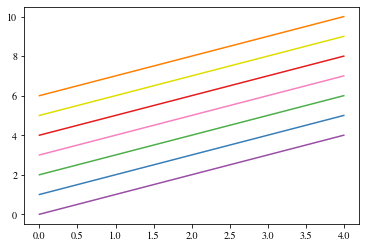

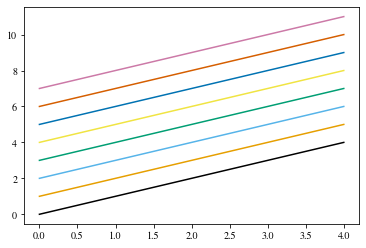

In [3]:
for i, colour in enumerate(colours_for_cmap):
    # for i, colour in enumerate(colours.values()):
    plt.plot(range(5), range(i, i + 5), color=colour)
plt.show()

for i, colour in enumerate(bang_wong_colours.values()):
    plt.plot(range(5), range(i, i + 5), color=colour)
plt.show()

### Supplemental material optimal angle


In [21]:
colours_sm = [colours[colour] for colour in ("pink", "red", "orange", "green", "blue")]

plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(
    1,
    2,
    figsize=(8, 3),
    sharey=True,
    gridspec_kw={
        "wspace": 0.1,
    },
)

path = "./from_Tuvia/SM/data_versus_mu/"
files = sorted(
    glob.glob(path + "*"),
    key=lambda f: float(f.split("weight_")[1].replace(".csv", "")),
)
for i, file in enumerate(files):
    data = pd.read_csv(file, header=None, names=["mu", "phi"])
    weight = float(file.split("weight_")[1].replace(".csv", ""))
    # adding the limit point separately confirmed, TODO: resolve the issue in .NB with w=0.5 and mu=1 to plot this in the pipeline
    if weight == 0.5:
        data = data[:-1]
    axs[0].plot(
        data["mu"],
        data["phi"],
        linewidth=2,
        label=r"$w = $" + str(weight),
        color=colours_sm[i],
    )
axs[0].legend(
    handlelength=1,
    labelspacing=0,
    frameon=False,
    bbox_to_anchor=(0, -0.09),
    loc="lower left",
    handletextpad=0.3,
)
axs[0].set(
    xlabel=r"commutator factor, $\mu$",
    ylabel=r"optimal angle, $\bar{\phi}$",
    xlim=(0, 1),
)
# c = [0.6, 0.8, 1]
# labels = [r'$\frac{3\pi}{5}$', r'$\frac{4\pi}{5}$', r'$\pi$']
coeffs = [0.5, 0.75, 1]
labels = [r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
axs[0].set_yticks([coeffs[i] * np.pi for i in range(3)], labels=labels)
xticks = np.arange(0, 1.5, 0.5)
xtickslabels = ["0", "0.5", "1"]
axs[0].set_xticks(xticks, labels=xtickslabels)
axs[0].grid("both", "both", color="gainsboro")

path = "./from_Tuvia/SM/data_versus_weight/"
files = sorted(
    glob.glob(path + "*"), key=lambda f: float(f.split("mu_")[1].replace(".csv", ""))
)
for i, file in enumerate(files):
    data = pd.read_csv(file, header=None, names=["weight", "phi"])
    mu = float(file.split("mu_")[1].replace(".csv", ""))
    axs[1].plot(
        data["weight"],
        data["phi"],
        linewidth=2,
        linestyle="--",
        label=r"$\mu = $" + f"{mu:.1f}",
        # color=list(reversed(colours_sm))[i],
        color=colours_sm[i],
    )
axs[1].legend(
    handlelength=1,
    labelspacing=0,
    frameon=False,
    bbox_to_anchor=(1.05, -0.099),
    loc="lower right",
    handletextpad=0.3,
)
axs[1].set(xlabel=r"weight, $w$", xlim=(0, 1))
axs[1].set_xticks(xticks, labels=xtickslabels)
axs[1].grid("both", "both", color="gainsboro")

axs[0].text(-0.2, -0.24, "(a)", transform=axs[0].transAxes)
axs[1].text(-0.02, -0.24, "(b)", transform=axs[1].transAxes)

# add boxes around each panel
axs[0].add_patch(
    patches.Rectangle(
        (-0.25, -0.3),
        width=1.28,
        height=1.33,
        linewidth=1,
        edgecolor="gray",
        facecolor="none",
        transform=axs[0].transAxes,
        clip_on=False,
    )
)
axs[1].add_patch(
    patches.Rectangle(
        (-0.04, -0.3),
        width=1.08,
        height=1.33,
        linewidth=1,
        edgecolor="gray",
        facecolor="none",
        transform=axs[1].transAxes,
        clip_on=False,
    )
)

fig.savefig("./Letter/figS2.pdf", bbox_inches="tight")
plt.clf()
# plt.show()

<Figure size 576x216 with 0 Axes>

### Old figures

Sinusoid's phases


In [1]:
# t = np.linspace(0, 2*np.pi, 100)
# c = np.cos(t)
# s = np.sin(t)
# plt.plot(t, s)
# plt.plot(t, c)
# plt.show()

#### Old Fig. 3


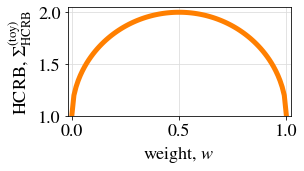

In [100]:
data3 = pd.read_csv("./csv/fig3.csv", header=None, names=["w", "HCRB"])

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(4, 2))

ax.plot(data3["w"], data3["HCRB"], linewidth=5, color=colours["orange"])
ax.grid(True, "both", "both", color="gainsboro")
epsilon = 0.02
ax.set(
    xlim=(0 - epsilon, 1 + epsilon),
    ylim=(1, None),
    xlabel=r"weight, $w$",
    ylabel=r"HCRB, $\Sigma_\mathrm{HCRB}^\mathrm{(toy)}$",
)

# fig.savefig("./Letter/fig3_old.pdf", bbox_inches="tight")
plt.show()

### New Fig. 3 (old Fig. 4)

Data has the following columns:

1. $\Omega/\Delta$, frequency ratio to detuning frequency
1. (QCRB/QCRB)${}^2$
1. QCRB in ASD
1. (HCRB/QCRB)${}^2$
1. HCRB bound in ASD
1. (Opt sensitivity/QCRB)${}^2$
1. Opt sensitivity in ASD
1. (Opt complex quadrature/QCRB)${}^2$
1. Opt complex quadrature in ASD

Data

In [2]:
data = pd.read_csv(
    "./from_Tuvia/toy_figure/data.csv", header=None, names=["w", "mu", "HCRB"]
)
data2D = data["HCRB"].to_numpy().reshape((101, 101)).transpose()[::-1]
data1Dmu10 = data.loc[data["mu"] == 1]
data1Dmu05 = data.loc[data["mu"] == 0.8]

names = {
    "all": [
        "frequency_ratio",
        "QCRB_ratio",
        "QCRB",
        "HCRB_ratio",
        "HCRB",
        "optimal_ratio",
        "optimal",
        "quadrature_ratio",
        "quadrature",
    ],
}
names["top_row"] = names["all"][2::2]
names["bottom_row"] = names["all"][1::2]

fig4_styles = ["-", "-", "--", "-."]
fig4_colours = [colours[i] for i in ["blue", "orange", "green", "pink"]]


def weight_from_file(f):
    weight = float(f.split("w=")[1].replace(".csv", ""))
    # make an integer if possible for nice formatting later
    if weight == 0:
        return 0
    elif weight == 1:
        return 1
    else:
        return weight


files = sorted(glob.glob("./csv/fig4_w=*.csv"), key=weight_from_file)
data = {
    file: {
        "weight": weight_from_file(file),
        "table": pd.read_csv(file, header=None, names=names["all"]),
    }
    for file in files
}

Old combined plot

In [4]:
# # whether to plot the (c) data when tuning, e.g., text and boxes overlaid
# no_data_mode = False
# # no_data_mode = True

# data_filt = {k: v for k, v in data.items() if v["weight"] <= 0.5}

# plt.rcParams.update({"font.size": 18})
# fig, axs = plt.subplots(
#     2,
#     len(data_filt),
#     # figsize=(2 * len(data_filt), 3 * 2),
#     figsize=(2 * len(data_filt), 2 * 2),
#     sharex=True,
#     sharey="row",
#     gridspec_kw={
#         "wspace": 0.05,
#         "hspace": 0.05,
#         "height_ratios": [2, 1],
#         # "height_ratios": [1, 1],
#     },
# )

# if not no_data_mode:
#     for weight_index, (file, data_dict) in enumerate(data_filt.items()):
#         table = data_dict["table"]
#         weight = data_dict["weight"]
#         rows = (
#             names["top_row"],
#             names["bottom_row"],
#         )
#         for j, row in enumerate(rows):
#             for i, curve in enumerate(row):
#                 axs[j, weight_index].plot(
#                     table["frequency_ratio"],
#                     table[curve],
#                     color=fig4_colours[i],
#                     linestyle=fig4_styles[i],
#                     linewidth=3,
#                 )
#             if j == 0:
#                 axs[j, weight_index].text(
#                     0.08,
#                     # 0.87,
#                     0.85,
#                     rf"$w = {weight}$",
#                     transform=axs[j, weight_index].transAxes,
#                     bbox=dict(
#                         facecolor="white",
#                         edgecolor="black",
#                         boxstyle="round",
#                     ),
#                 )

# for ax in axs.flatten():
#     ax.grid("both", "both", color="gainsboro")
# axs[0, 0].set(
#     ylabel=r"sensitivity [Hz${}^{-1/2}$]",
#     yscale="log",
#     # ylim=(7e-25, 1.2e-22),
#     ylim=(7e-25, 7e-23),
# )
# epsilon = 0.02
# multiepsilon = 0.88
# axs[1, 0].set(
#     # ylabel='ratio to the QCRB\nin power units',
#     # ylabel='ratio to QCRB',
#     ylabel="ratio to\nthe QCRB",
#     ylim=(1 - epsilon, 2 + epsilon),
#     xscale="log",
#     # xlim=(1/3, 3),
#     # xlim=(1/2, 2),
#     xlim=(1 / 2 * multiepsilon, 2 / multiepsilon),
# )
# axs[1, 0].xaxis.set_minor_formatter(NullFormatter())
# axs[1, 0].yaxis.set_minor_formatter(ScalarFormatter())
# axs[1, 0].set_xticks([0.5, 1, 2], labels=([0.5, "1", "2"]))
# # axs[1,0].set_yticks([1, np.sqrt(2), 2], labels=([1, r'$\sqrt{2}$', 2]))
# axs[1, 0].set_yticks([1, 1.5, 2], labels=([1, 1.5, 2]))
# # axs[1,0].set_yticks([0.5, 1, 2], labels=([r"$\dfrac{1}{2}$", "1", "2"]))

# # hide tick and tick label of the big axis
# fig.add_subplot(111, frameon=False)
# plt.tick_params(
#     labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
# )
# plt.xlabel(
#     # r"ratio of frequency to the detuning frequency, $\Omega\,/\Delta$",
#     r"frequency, $\Omega$ [$\Delta$]",
#     labelpad=1,
# )
# # fig.align_labels()

# handles = [
#     Line2D(
#         [0],
#         [0],
#         color=colour,
#         linewidth=3,
#         linestyle=fig4_styles[i],
#     )
#     for i, colour in enumerate(fig4_colours)
# ]
# labels = [
#     "QCRB",
#     "HCRB",
#     "optimal measurement scheme",
#     "standard variational readout scheme",
# ]
# reorder = lambda xarr: [xarr[1], xarr[0], xarr[2], xarr[3]]
# plt.legend(
#     handles=reorder(handles),
#     labels=reorder(labels),
#     ncol=2,
#     handlelength=2.5,
#     columnspacing=1.5,
#     # bbox_to_anchor=(-0.11, 1.3),
#     bbox_to_anchor=(-0.11, -0.13),
#     loc="upper left",
#     frameon=False,
# )

# # other two panels
# posx, posy = (0.16, 1.045)
# width, height = (0.45 / 2, 0.45)
# ax = fig.add_axes(
#     [
#         # bottom left corner in normalised coords
#         posx,
#         posy,
#         # width and height
#         width,
#         height,
#     ]
# )
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# plot = ax.imshow(data2D, cmap="hot", aspect="auto")
# colour_bar = fig.colorbar(plot, cax=cax)
# colour_bar.set_label(r"HCRB, $\Sigma_H$ [$\Sigma_Q$]")

# muNum, wNum = data2D.shape
# ax.set_ylabel(r"commutator, $\mu$ [$i\,$]")
# ax.set_xlabel(r"weight, $w$", labelpad=0)
# ax.set_xticks([0, int(0.5 * wNum), wNum - 1], labels=([0, 0.5, 1]))
# ax.set_yticks(
#     [0, int(0.5 * muNum), int(0.2 * muNum), muNum - 1], labels=([1, 0.5, 0.8, 0])
# )

# ax1_vertical_scale = 1.02
# axs[1] = fig.add_axes(
#     [
#         # bottom left corner in normalised coords
#         # posx + 0.37, posy,
#         posx + 0.44,
#         posy,
#         # width and height
#         # 0.6 / 2 * 0.766, 0.6 * 0.766
#         width,
#         height * axs[1]_vertical_scale,
#     ]
# )
# axs[1].plot(
#     *(data1Dmu10[key] for key in ("w", "HCRB")),
#     color=colours["orange"],
#     linewidth=3,
#     label=r"$\mu=1$",
# )
# axs[1].plot(
#     *(data1Dmu05[key] for key in ("w", "HCRB")),
#     color=colours["red"],
#     linewidth=3,
#     linestyle="--",
#     label=r"$\mu=0.8$",
# )
# axs[1].legend(
#     # ncol=2,
#     handlelength=1.4,
#     # columnspacing=1,
#     # bbox_to_anchor=(-0.24, -0.3),
#     # loc="upper left",
#     frameon=False,
# )
# axs[1].set_ylabel(r"HCRB, $\Sigma_H$ [$\Sigma_Q$]")
# ax1.grid(True, "both", "both", color="gainsboro")
# epsilon = 0.02
# ax1.set(
#     xlim=(0 - epsilon, 1 + epsilon),
#     ylim=(1, 2 + epsilon),
#     # ylabel=r"HCRB, $\Sigma_H'$",
# )
# ax1.set_xlabel(r"weight, $w$", labelpad=0)
# ax1.set_xticks([0, 0.5, 1], labels=([0, 0.5, 1]))
# ax1.set_yticks([1, 1.5, 2], labels=([1.0, 1.5, 2.0]))

# ax.text(-0.41, -0.25, "(a)", transform=ax.transAxes)
# ax1.text(-0.39, -0.25, "(b)", transform=ax1.transAxes)
# ax1.text(-0.65, -1.12, "(c)", transform=axs[1, 0].transAxes)

# # bounding boxes
# ax.add_patch(
#     patches.Rectangle(
#         (-0.44, -0.314),
#         width=1.99,
#         height=1.374,
#         linewidth=1,
#         edgecolor="gray",
#         facecolor="none",
#         transform=ax.transAxes,
#         clip_on=False,
#     )
# )
# ax1.add_patch(
#     patches.Rectangle(
#         (-0.44, -0.314 / ax1_vertical_scale),
#         width=1.5,
#         height=1.374 / ax1_vertical_scale,
#         linewidth=1,
#         edgecolor="gray",
#         facecolor="none",
#         transform=ax1.transAxes,
#         clip_on=False,
#     )
# )
# axs[1, 0].add_patch(
#     patches.Rectangle(
#         (-0.69, -1.25),
#         width=4.87,
#         height=4.37,
#         linewidth=1,
#         edgecolor="gray",
#         facecolor="none",
#         transform=axs[1, 0].transAxes,
#         clip_on=False,
#     )
# )

# fig.savefig("./Letter/fig2.pdf", bbox_inches="tight", pad_inches=0.01)
# # plt.show()
# plt.clf()

/tmp/ipykernel_26424/1167209621.py:242: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.clf()
/tmp/ipykernel_26424/1167209621.py:242: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.clf()


<Figure size 576x288 with 0 Axes>

New Fig 2

In [5]:
data_filt = {k: v for k, v in data.items() if v["weight"] <= 0.5}

plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(
    1,
    2,
    figsize=(8, 2),
    # sharex=True,
    # sharey="row",
    gridspec_kw={
        "wspace": 1,
        # "hspace": 0.05,
    },
)


from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

plot = axs[0].imshow(data2D, cmap="hot", aspect="auto")
colour_bar = fig.colorbar(plot, cax=cax)
colour_bar.set_label(r"HCRB, $\Sigma_H$ [$\Sigma_Q$]")

muNum, wNum = data2D.shape
axs[0].set_ylabel(r"commutator, $\mu$ [$i$]")
axs[0].set_xlabel(r"weight, $w$", labelpad=0)
axs[0].set_xticks([0, int(0.5 * wNum), wNum - 1], labels=([0, 0.5, 1]))
axs[0].set_yticks(
    [0, int(0.5 * muNum), int(0.2 * muNum), muNum - 1], labels=([1, 0.5, 0.8, 0])
)

axs[1].plot(
    *(data1Dmu10[key] for key in ("w", "HCRB")),
    color=colours["orange"],
    linewidth=3,
    label=r"$\mu=1$",
)
axs[1].plot(
    *(data1Dmu05[key] for key in ("w", "HCRB")),
    color=colours["red"],
    linewidth=3,
    linestyle="--",
    label=r"$\mu=0.8$",
)
axs[1].legend(
    # ncol=2,
    handlelength=1.4,
    # columnspacing=1,
    # bbox_to_anchor=(-0.24, -0.3),
    # loc="upper left",
    frameon=False,
)
axs[1].set_ylabel(r"HCRB, $\Sigma_H$ [$\Sigma_Q$]")
axs[1].grid(True, "both", "both", color="gainsboro")
epsilon = 0.02
axs[1].set(
    xlim=(0 - epsilon, 1 + epsilon),
    ylim=(1, 2 + epsilon),
    # ylabel=r"HCRB, $\Sigma_H'$",
)
axs[1].set_xlabel(r"weight, $w$", labelpad=0)
axs[1].set_xticks([0, 0.5, 1], labels=([0, 0.5, 1]))
axs[1].set_yticks([1, 1.5, 2], labels=([1.0, 1.5, 2.0]))

axs[0].text(-0.41, -0.32, "(a)", transform=axs[0].transAxes)
axs[1].text(-0.43, -0.32, "(b)", transform=axs[1].transAxes)

axs[0].plot(
    [1.6 for _ in range(2)],
    (-0.3, 1.05),
    clip_on=False,
    linestyle="dotted",
    color="grey",
    transform=axs[0].transAxes,
)


# # bounding boxes
# ax.add_patch(
#     patches.Rectangle(
#         (-0.44, -0.314),
#         width=1.99,
#         height=1.374,
#         linewidth=1,
#         edgecolor="gray",
#         facecolor="none",
#         transform=ax.transAxes,
#         clip_on=False,
#     )
# )
# ax1.add_patch(
#     patches.Rectangle(
#         (-0.44, -0.314 / ax1_vertical_scale),
#         width=1.5,
#         height=1.374 / ax1_vertical_scale,
#         linewidth=1,
#         edgecolor="gray",
#         facecolor="none",
#         transform=ax1.transAxes,
#         clip_on=False,
#     )
# )


fig.savefig("./Letter/fig2.pdf", bbox_inches="tight", pad_inches=0.01)
plt.clf()

<Figure size 576x144 with 0 Axes>

New Fig 3

In [16]:
# whether to plot the (c) data when tuning, e.g., text and boxes overlaid
no_data_mode = False
# no_data_mode = True

data_filt = {k: v for k, v in data.items() if v["weight"] <= 0.5}

plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(
    2,
    len(data_filt),
    # figsize=(2 * len(data_filt), 3 * 2),
    figsize=(2 * len(data_filt), 2 * 2),
    sharex=True,
    sharey="row",
    gridspec_kw={
        "wspace": 0.05,
        "hspace": 0.08,
        "height_ratios": [2, 1],
        # "height_ratios": [1, 1],
    },
)

if not no_data_mode:
    for weight_index, (file, data_dict) in enumerate(data_filt.items()):
        table = data_dict["table"]
        weight = data_dict["weight"]
        rows = (
            names["top_row"],
            names["bottom_row"],
        )
        for j, row in enumerate(rows):
            for i, curve in enumerate(row):
                if j == 1:
                    yaxis_data = np.sqrt(table[curve])
                else:
                    yaxis_data = table[curve]
                axs[j, weight_index].plot(
                    table["frequency_ratio"],
                    yaxis_data,
                    color=fig4_colours[i],
                    linestyle=fig4_styles[i],
                    linewidth=3,
                )
            if j == 0:
                axs[j, weight_index].text(
                    0.08,
                    # 0.87,
                    0.85,
                    rf"$w = {weight}$",
                    transform=axs[j, weight_index].transAxes,
                    bbox=dict(
                        facecolor="white",
                        alpha=0.5,
                        edgecolor="black",
                        boxstyle="round",
                    ),
                )

for ax in axs.flatten():
    ax.grid("both", "both", color="gainsboro")
axs[0, 0].set(
    ylabel=r"sensitivity [Hz${}^{-0.5}$]",
    yscale="log",
    # ylim=(7e-25, 1.2e-22),
    ylim=(7e-25, 7e-23),
)
epsilon = 0.02
multiepsilon = 0.88
axs[1, 0].set(
    # ylabel='ratio to the QCRB\nin power units',
    # ylabel='ratio to QCRB',
    ylabel="ratio to\nthe QCRB",
    ylim=(1 - epsilon / 2, np.sqrt(2) + epsilon / 2),
    xscale="log",
    # xlim=(1/3, 3),
    # xlim=(1/2, 2),
    xlim=(1 / 2 * multiepsilon, 2 / multiepsilon),
)
axs[1, 0].xaxis.set_minor_formatter(NullFormatter())
axs[1, 0].set_xticks([0.5, 1, 2], labels=([0.5, "1", "2"]))
axs[1, 0].yaxis.set_minor_formatter(ScalarFormatter())
axs[1, 0].set_yticks([1, np.sqrt(2)], labels=([1, r"$\sqrt{2}$"]))

# hide tick and tick label of the big axis
fig.add_subplot(111, frameon=False)
plt.tick_params(
    labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
)
plt.xlabel(
    # r"ratio of frequency to the detuning frequency, $\Omega\,/\Delta$",
    r"frequency, $\Omega$ [$\Delta$]",
    labelpad=1,
)
# fig.align_labels()

handles = [
    Line2D(
        [0],
        [0],
        color=colour,
        linewidth=3,
        linestyle=fig4_styles[i],
    )
    for i, colour in enumerate(fig4_colours)
]
labels = [
    "QCRB",
    "HCRB",
    "optimal nonstationary measurement",
    "optimal stationary measurement",
]
reorder = lambda xarr: [xarr[1], xarr[0], xarr[2], xarr[3]]
plt.legend(
    handles=reorder(handles),
    labels=reorder(labels),
    ncol=2,
    handlelength=2.5,
    columnspacing=1.5,
    labelspacing=0.3,
    # bbox_to_anchor=(-0.11, 1.3),
    bbox_to_anchor=(-0.11, -0.13),
    loc="upper left",
    frameon=False,
)

fig.savefig("./Letter/fig3.pdf", bbox_inches="tight", pad_inches=0)
plt.clf()

/tmp/ipykernel_28883/652449414.py:127: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.clf()
/tmp/ipykernel_28883/652449414.py:127: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.clf()


<Figure size 576x288 with 0 Axes>

### Lossy plots

In [5]:
c = 3e8
Titm = 0.014
L = 4e3
D = 2 * Pi * 3000

tRT = 2 * L / c
g = -1 / (2 * tRT) * np.log(1 - Titm)


def gl(Tarm):
    return -1 / (2 * tRT) * np.log(1 - Tarm)


def mu(O, Tarm):
    return 2 * D * O / ((g + gl(Tarm)) ** 2 + D**2 + O**2)


def gap_equal_weights(O, Tarm, w):
    if w != 0.5:
        raise ValueError("Gap analytic result only valid for equal weights.")
    else:
        return 2 / (1 + np.sqrt(1 - mu(O, Tarm) ** 2))


def gap_mu_one(w):
    return 1 + 2 * np.sqrt(w * (1 - w))


# assume 10 dB squeezing, change in FOM not accouting for signal
def added_noise_het(Tmeas, w):
    eminus2r = 0.01
    # noise at 3D
    het_noise = Tmeas / 2 + (1 - Tmeas) / 2 * eminus2r
    # noise at 3D relative to vacuum
    het_noise_ratio = het_noise / 0.5
    # noise in hatB relative to lossless, perfect squeezing
    total_noise_in_het_quad_relative = 1 + het_noise_ratio
    # equal_weights_FOM_relative noise
    return (2 * (1 - w) * 1 + 2 * w * total_noise_in_het_quad_relative) / 2


def crossover_point_mu_one(Tmeas, print_result=False):
    def net_gain(w):
        relative_gain = gap_mu_one(w) / 2
        relative_loss = added_noise_het(Tmeas, w)
        return relative_gain * relative_loss

    def error(w):
        return abs(net_gain(w) - 1)

    result = optimize.minimize_scalar(error, bounds=(0, 0.5), method="bounded")
    if print_result:
        print(
            r"For measurement loss $\eta=$" + f"{Tmeas}, the crossover weight w* is\n",
            result,
        )
    # crossover weight, w*
    return result.x


# # because of imperfect squeezing, even if zero measurement loss the crossover point is still at w=0.434
# crossover_point_mu_one(Tmeas=0, print_result=True)
# # 10% loss agrees with mathematica's solution of {w -> 0.31963}
# crossover_point_mu_one(Tmeas=0.1, print_result=True)

In [6]:
def general_gap(O, Tarm, w, print_result=False):
    mu0 = mu(O, Tarm)

    def objective(phi):
        return w / np.cos(phi) ** 2 + (1 - w) / np.cos(phi + np.arcsin(mu)) ** 2

    result = optimize.minimize_scalar(objective, bounds=(0, 2 * Pi), method="bounded")
    if print_result:
        print(f"For mu={mu0} and w={w}, the HCRB is\n", result)
    return result.fun


# this is really slow, why? TODO: fix this
# general_gap(D, 0, 0.5)

Gap with equal weights versus loss

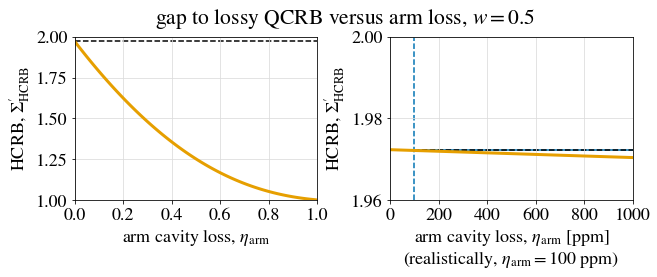

In [163]:
loss_list = np.linspace(0, 1 - 1e-6, 100)
gap_list = [gap_equal_weights(O=D, Tarm=Tarm, w=0.5) for Tarm in loss_list]

loss_list_1 = np.linspace(0, 1000e-6, 100)
gap_list_1 = [gap_equal_weights(O=D, Tarm=Tarm, w=0.5) for Tarm in loss_list_1]
gap0 = gap_equal_weights(O=D, Tarm=100e-6, w=0.5)

plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(
    1,
    2,
    figsize=(10, 3),
    gridspec_kw={
        "wspace": 0.3,
    },
)

axs[0].plot(loss_list, gap_list, "-", linewidth=3, color=bang_wong_colours["Orange"])
axs[0].set(
    xlim=(0, 1),
    ylim=(1, 2),
    xlabel=r"arm cavity loss, $\eta_\mathrm{arm}$",
    ylabel=r"HCRB, $\Sigma_\mathrm{HCRB}'$",
)
axs[0].set_xticks(np.linspace(0, 1, 6), [f"{x:.1f}" for x in np.linspace(0, 1, 6)])
axs[0].axhline(gap_list[0], zorder=1, color=bang_wong_colours["Black"], linestyle="--")

axs[1].plot(
    loss_list_1, gap_list_1, "-", linewidth=3, color=bang_wong_colours["Orange"]
)
axs[1].set(
    xlim=(0, 1000e-6),
    ylim=(1.96, 2),
    xlabel=r"arm cavity loss, $\eta_\mathrm{arm}$ [ppm]"
    + "\n"
    + r"(realistically, $\eta_\mathrm{arm}=100$ ppm)",
    ylabel=r"HCRB, $\Sigma_\mathrm{HCRB}'$",
)
axs[1].axvline(100e-6, zorder=1, color=bang_wong_colours["Blue"], linestyle="--")
axs[1].axhline(gap0, zorder=1, color=bang_wong_colours["Blue"], linestyle="-")
axs[1].axhline(
    gap_list_1[0], zorder=1, color=bang_wong_colours["Black"], linestyle="--"
)
axs[1].set_xticks(
    np.linspace(0, 1000e-6, 6), [f"{x:.0f}" for x in np.linspace(0, 1000, 6)]
)

for ax in axs:
    ax.grid(True, "both", "both", color="gainsboro")

fig.suptitle("gap to lossy QCRB versus arm loss, $w=0.5$", y=1.02)

fig.savefig("./figures/losses/equal_weights_versus_arm_loss.pdf", bbox_inches="tight")
plt.show()

Added noise from heterodyne realisation of lossless optimal measurement scheme
(i.e. the tightness of the once optimal measurement)

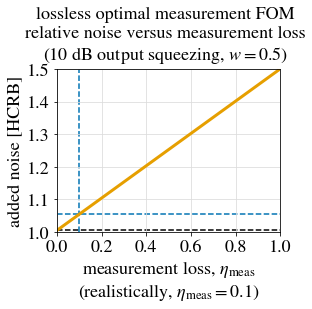

In [130]:
loss_list = np.linspace(0, 1, 100)
noise_list = [added_noise_het(Tmeas, w=0.5) for Tmeas in loss_list]


plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(loss_list, noise_list, "-", linewidth=3, color=bang_wong_colours["Orange"])

ax.set(
    xlim=(0, 1),
    ylim=(1, 1.5),
    xlabel=r"measurement loss, $\eta_\mathrm{meas}$"
    + "\n"
    + r"(realistically, $\eta_\mathrm{meas}=0.1$)",
    ylabel=r"added noise [HCRB]",
)
ax.axhline(noise_list[0], zorder=1, color=bang_wong_colours["Black"], linestyle="--")
ax.axvline(0.1, zorder=1, color=bang_wong_colours["Blue"], linestyle="--")
ax.axhline(1.0545, zorder=1, color=bang_wong_colours["Blue"], linestyle="--")
ax.grid(True, "both", "both", color="gainsboro")
fig.suptitle(
    "lossless optimal measurement FOM\nrelative noise versus measurement loss\n"
    + r"(10 dB output squeezing, $w=0.5$)",
    y=1.17,
    fontsize=18,
)
ax.set_xticks(np.linspace(0, 1, 6), [f"{x:.1f}" for x in np.linspace(0, 1, 6)])
ax.set_yticks(np.linspace(1, 1.5, 6), [f"{x:.1f}" for x in np.linspace(1, 1.5, 6)])

fig.savefig(
    "./figures/losses/lossless_opt_meas_added_noise---equal_weights---versus_measurement_loss.pdf",
    bbox_inches="tight",
)
plt.show()

Sensitivity versus frequency relative to lossy QCRB, different weights.

In [ ]:
weights = [0, 0.05, 0.3, 0.5]

Tarm = 100e-6
Tmeas = 0.1

multiepsilon = 0.88
freq_lims = [1 / 2 * multiepsilon, 2 / multiepsilon]

for w in (weights[-1],):
    freq_ratio_list = np.logspace(np.log10(freq_lims[0]), np.log10(freq_lims[1]), 100)
    O_list = [k * D for k in freq_ratio_list]
    HCRB_lossy_gap = [gap_equal_weights(O=O, Tarm=Tarm, w=w) for O in O_list]

    noise_relative = added_noise_het(Tmeas, w=w)
    # TODO: fix this, the squeezing is narrowband
    lossless_optimal_list = noise_relative * np.array(HCRB_lossy_gap)

plt.plot(freq_ratio_list, HCRB_lossy_gap)
# plt.plot(freq_ratio_list, lossless_optimal_list)
plt.xscale("log")

Since the added noise is only understood at the detuning frequency (because I assume that the cavities are narrow band, then let's plot that)

In [117]:
Tarm = 100e-6
Tmeas = 0.1
# squeezing is narrowband, so just look at the detuning frequency
O = D

data = pd.read_csv(
    "./csv/lossy_gap_versus_weight.csv", header=None, names=["w", "HCRB"]
)

weight_list = data["w"]
HCRB_lossy_gap = data["HCRB"]
# variational readout sensitivity
gap0 = data["HCRB"].to_numpy()[-1]
# lossless optimal measurement sensitivity
noise_relative = [added_noise_het(Tmeas, w=w) for w in weight_list]
lossless_optimal_list = np.array(noise_relative) * np.array(HCRB_lossy_gap)
# crossover point, approximate
wstar0 = weight_list[np.searchsorted(lossless_optimal_list, gap0)]

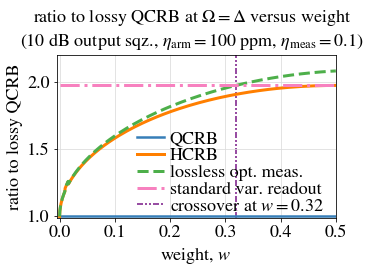

In [136]:
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(
    weight_list,
    np.full_like(weight_list, 1),
    "-",
    linewidth=2.5,
    color=colours["blue"],
    label="QCRB",
)
ax.plot(
    weight_list, HCRB_lossy_gap, "-", linewidth=3, color=colours["orange"], label="HCRB"
)
ax.plot(
    weight_list,
    lossless_optimal_list,
    "--",
    linewidth=3,
    color=colours["green"],
    label="lossless opt. meas.",
)
ax.plot(
    weight_list,
    np.full_like(weight_list, gap0),
    "-.",
    linewidth=3,
    color=colours["pink"],
    label="standard var. readout",
)

ax.set(
    xlim=(0 - 0.005, 0.5),
    ylim=(1 - 0.01, 2.2),
    xlabel=r"weight, $w$",
    ylabel="ratio to lossy QCRB",
)
ax.set_xticks(np.linspace(0, 0.5, 6), [f"{x:.1f}" for x in np.linspace(0, 0.5, 6)])
ax.axvline(
    wstar0,
    zorder=1,
    color=colours["purple"],
    linestyle=(0, (3, 1, 1, 1, 1, 1)),
    linewidth=2,
    label=rf"crossover at $w={wstar0:.2f}$",
)
ax.grid(True, "both", "both", color="gainsboro")
fig.suptitle(
    "ratio to lossy QCRB at $\Omega=\Delta$ versus weight\n"
    + r"(10 dB output sqz., $\eta_\mathrm{arm}=$100 ppm, $\eta_\mathrm{meas}=0.1$)",
    y=1.1,
    fontsize=18,
)

ax.legend(
    handlelength=1.5,
    labelspacing=0.01,
    frameon=False,
    bbox_to_anchor=(0.23, -0.08),
    loc="lower left",
    handletextpad=0.3,
    # ncol=2
)

fig.savefig(
    "./figures/losses/ratio_to_lossy_QCRB_versus_weight.pdf", bbox_inches="tight"
)
plt.show()

Crossover point versus loss

In [120]:
loss_list = np.linspace(0, 1 - 1e-6, 100)

# wstar_list = [crossover_point_mu_one(Tmeas) for Tmeas in loss_list]
# wstar0 = crossover_point_mu_one(0.1)

# to not assume that mu=1, I need to use the mathematica results
wstar_list = [
    weight_list[
        np.searchsorted(
            np.array([added_noise_het(Tmeas, w=w) for w in weight_list])
            * np.array(HCRB_lossy_gap),
            gap0,
        )
    ]
    for Tmeas in loss_list
]

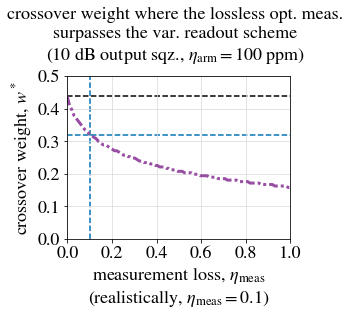

In [131]:
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(
    loss_list,
    wstar_list,
    linestyle=(0, (3, 1, 1, 1, 1, 1)),
    linewidth=3,
    color=colours["purple"],
)

ax.set(
    xlim=(0, 1),
    ylim=(0, 0.5),
    xlabel=r"measurement loss, $\eta_\mathrm{meas}$"
    + "\n"
    + r"(realistically, $\eta_\mathrm{meas}=0.1$)",
    ylabel=r"crossover weight, $w^*$",
)
ax.set_xticks(np.linspace(0, 1, 6), [f"{x:.1f}" for x in np.linspace(0, 1, 6)])
ax.set_yticks(np.linspace(0, 0.5, 6), [f"{x:.1f}" for x in np.linspace(0, 0.5, 6)])
ax.axhline(wstar_list[0], zorder=1, color=bang_wong_colours["Black"], linestyle="--")
ax.axvline(0.1, zorder=1, color=bang_wong_colours["Blue"], linestyle="--")
ax.axhline(wstar0, zorder=1, color=bang_wong_colours["Blue"], linestyle="--")
ax.grid(True, "both", "both", color="gainsboro")
fig.suptitle(
    "crossover weight where the lossless opt. meas.\nsurpasses the var. readout scheme\n"
    + r"(10 dB output sqz., $\eta_\mathrm{arm}=$100 ppm)",
    y=1.2,
    fontsize=18,
)

fig.savefig(
    "./figures/losses/crossover_point_versus_measurement_loss.pdf", bbox_inches="tight"
)
plt.show()